In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
t = 100
np.random.seed(0)
x = 10 * np.random.rand(t)
y = x + 2*(np.random.rand(t) - 0.5)

xt = np.ones((x.shape[0], 2))
xt[:,1] = x

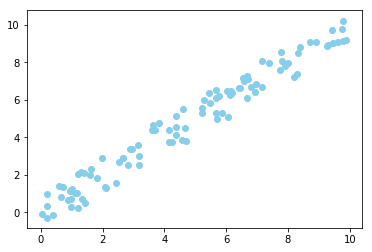

In [3]:
plt.scatter(x,y, c='skyblue')
plt.show()

In [4]:
class LinearRegression:
    
    def loss(self, h, y):
        return (np.power(h - y, 2)).mean()
    
    def fit(self, x, y, epochs=1000, lr=0.01):
        theta = np.zeros(x.shape[1])   # Weights        

        for i in range(epochs):            
            z = np.dot(x, theta)
            grad = np.dot(x.T, (z - y)) / y.size
            theta -= (grad * lr)
                        
            if(i % 100 == 0):
                z = np.dot(x, theta)          
                loss = self.loss(z, y)
                print('epoch {} - loss: {}'.format(i, loss))
        
        self.theta = theta
        
    def predict(self, x):
        return np.dot(x, self.theta)

In [10]:
model = LinearRegression()
model.fit(xt, y, 20000)

epoch 0 - loss: 14.88859463980994
epoch 100 - loss: 0.30514448997522686
epoch 200 - loss: 0.3050574639102731
epoch 300 - loss: 0.3050062453984868
epoch 400 - loss: 0.3049761011428434
epoch 500 - loss: 0.30495835997628845
epoch 600 - loss: 0.3049479185510813
epoch 700 - loss: 0.30494177333171135
epoch 800 - loss: 0.30493815661077955
epoch 900 - loss: 0.30493602801788305
epoch 1000 - loss: 0.3049347752511353
epoch 1100 - loss: 0.30493403794503676
epoch 1200 - loss: 0.3049336040092828
epoch 1300 - loss: 0.30493334861977933
epoch 1400 - loss: 0.30493319831227866
epoch 1500 - loss: 0.3049331098499718
epoch 1600 - loss: 0.30493305778617075
epoch 1700 - loss: 0.3049330271444269
epoch 1800 - loss: 0.30493300911046745
epoch 1900 - loss: 0.30493299849672134
epoch 2000 - loss: 0.3049329922500838
epoch 2100 - loss: 0.304932988573674
epoch 2200 - loss: 0.3049329864099517
epoch 2300 - loss: 0.3049329851365098
epoch 2400 - loss: 0.3049329843870354
epoch 2500 - loss: 0.30493298394593826
epoch 2600 - l

In [11]:
param = model.theta
param

array([0.11616005, 0.98731021])

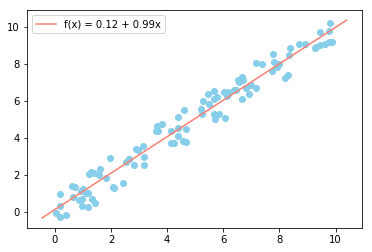

In [12]:
# Plot in 2D [Just when the data is in 2D]
x_val = [np.min(xt[:, 1] - 0.5), np.max(xt[:,1] + 0.5)]
y_val = param[0] + np.dot(param[1], x_val)

plt.scatter(x,y, c='skyblue')
plt.plot(x_val, y_val, label='f(x) = {:.2f} + {:.2f}x'.format(param[0], param[1]), color='salmon')
plt.legend()
plt.show()